<a href="https://colab.research.google.com/github/venkateshkumar21/Data-Science-and-ML-Projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.7984386089425124
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.49      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



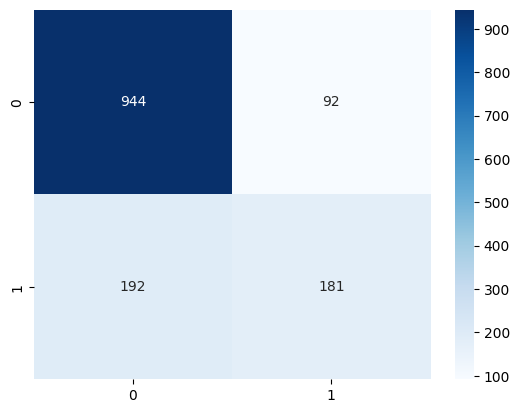

Predictions: ['Yes' 'No' 'No' 'No']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df=pd.read_csv("Telco-Customer-Churn.csv")
df.head()
df.isnull().sum()
df.dropna(inplace=True)
le=LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])

df.drop(columns=['customerID'],inplace=True)
df.head()
x=df.drop(columns=['Churn'])
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.show()
sample_data = [
    [0, 1, 0, 12,0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 80.50, 966.00],  # Example data point
    [1, 0, 1, 48,1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 65.25, 3132.00],  # Another example
    [0, 0, 0, 2,1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 25.00, 50.00],  # Yet another example
    [1, 1, 0, 60,0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 110.00, 6600.00] # And another example
]
sample_data = np.array(sample_data)
predictions = model.predict(sample_data)
predictions=le.inverse_transform(predictions)
print("Predictions:", predictions)